In [1]:
from virgo.cluster import VirgoCluster
from virgo.kernel import VirgoKernel, VirgoSimpleKernel
from virgo.mixture import VirgoMixture, VirgoClustering
from virgo.cleaner import AutoDensityCleaner

%load_ext autoreload
%autoreload 2

%matplotlib notebook
# %matplotlib inline

Reading  1335549  particles
Data set 0 - Shape: (627738, 9)
Mean / Std: 74480.006 / 245428.748
Min / Max: -19278.359 / 1335548.000
Data set 1 - Shape: (627738, 8)
Mean / Std: -0.000 / 1.000
Min / Max: -5.077 / 16.049


<IPython.core.display.Javascript object>


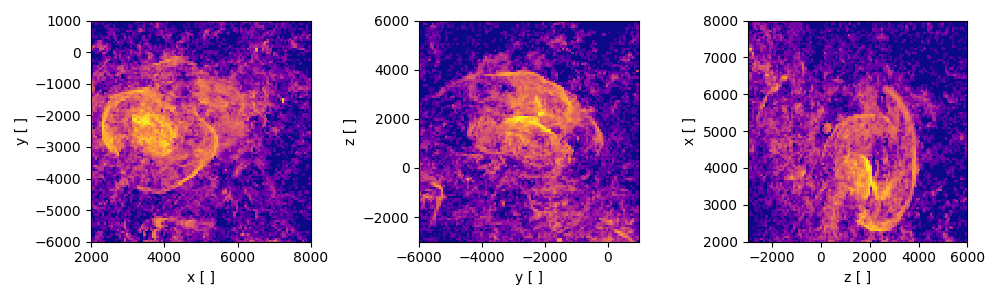

In [2]:
snap_id = 790
filebase = f"/home/max/Software/virgo/data/250x_hd/snap_{snap_id}"

# snap_id = 38
# filebase = f"/home/max/Software/virgo/data/250x_mhd/250x_mhd_snap_0{snap_id}"

virgo_cluster = VirgoCluster(
    file_name=filebase, io_mode=1, cut_mach_dim=-2, n_max_data=800000, 
)
# virgo_cluster.data = virgo_cluster.data[:, :-1]

virgo_cluster.scale_data()
virgo_cluster.print_datastats()
virgo_cluster.plot_raw_hists(
    bins=100, plot_range=[[2000., 8000.], [-6000., 1000.], [-3000., 6000.]]
)

In [3]:
virgo_kernel = VirgoKernel(virgo_cluster, k_nystroem=100, pca_comp=5)
virgo_kernel()
virgo_cluster.print_datastats()

Data set 0 - Shape: (627738, 9)
Mean / Std: 74480.006 / 245428.748
Min / Max: -19278.359 / 1335548.000
Data set 1 - Shape: (627738, 5)
Mean / Std: 0.000 / 0.237
Min / Max: -0.520 / 0.872


ELBO: 3.797624327795159
Mixture weights [0.53062978 0.46937022]
(array([0, 1]), array([333778, 293960]))


<IPython.core.display.Javascript object>


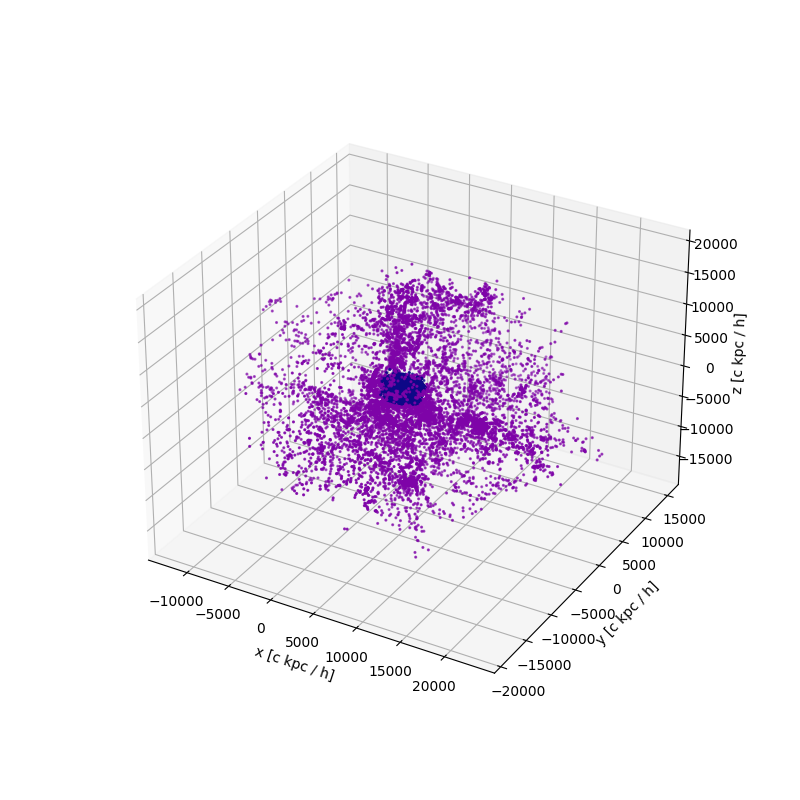

In [4]:
virgo_mixture = VirgoMixture(virgo_cluster, n_comp=2)
elbo = virgo_mixture.fit()

print(f"ELBO: {elbo}")
print(f"Mixture weights {virgo_mixture.model.weights_}")

virgo_mixture.predict(remove_uncertain_labels=False)
labels_removed = virgo_cluster.get_labels(return_counts=True)
print(labels_removed)

# virgo_cluster.cluster_labels[virgo_cluster.cluster_labels == 1] = 2
# virgo_cluster.cluster_labels[virgo_cluster.cluster_labels == 1][0:100] = 4

# virgo_cluster.plot_cluster(cmap_vmax=4, n_step=25, plot_kernel_space=True, store_gif=False, gif_title="nystroem_separation_kernelspace")
virgo_cluster.plot_cluster(cmap_vmax=4, n_step=25, store_gif=False, gif_title="nystroem_separation_kernelspace")

Density cutoff 1.3297835274872963e-10
Densities: [1.33111464e-10 5.94413319e-14]
(array([-1,  0]), array([293960, 333778]))


/home/max/Software/virgo/virgo/cleaner.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.clusters = np.array(self.clusters)
/home/max/Software/virgo/virgo/cleaner.py:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.labels = np.array(self.labels)


<IPython.core.display.Javascript object>


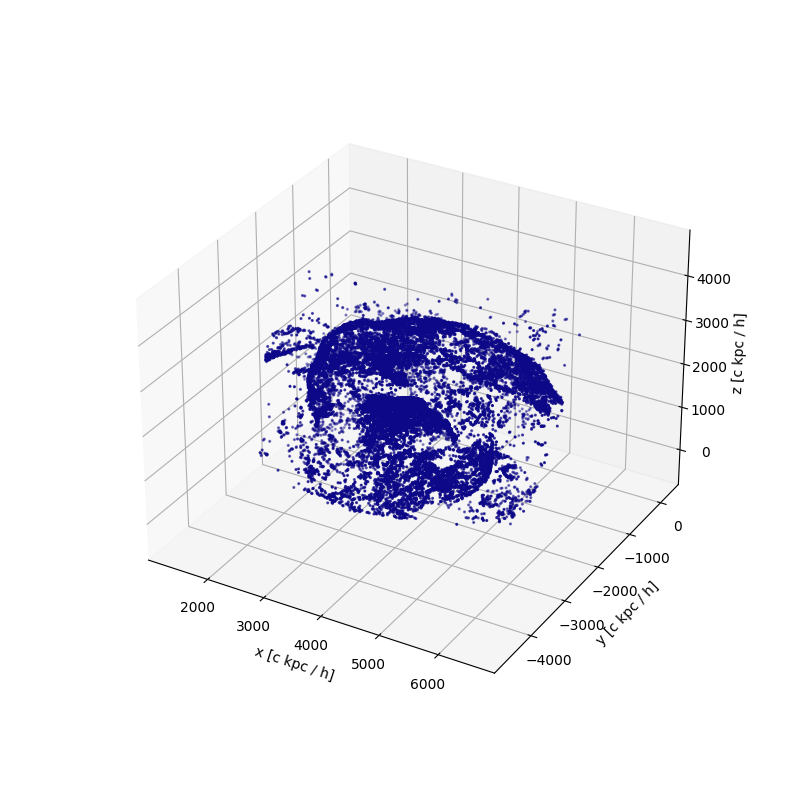

In [5]:
d_cleaner = AutoDensityCleaner(virgo_cluster)
d_cleaner.clean()
print(virgo_cluster.get_labels(return_counts=True))
virgo_cluster.plot_cluster(n_step=10)

In [6]:
vc_2 = VirgoCluster(file_name=None)
vc_2.data = virgo_cluster.cluster[virgo_cluster.cluster_labels >=0][::10]
vc_2.scale_data()
vc_2.print_datastats()

Data set 0 - Shape: (33378, 9)
Mean / Std: 73159.901 / 240527.959
Min / Max: -4678.581 / 1335438.000
Data set 1 - Shape: (33378, 8)
Mean / Std: 0.000 / 1.000
Min / Max: -3.150 / 13.638


In [7]:
virgo_kernel = VirgoKernel(
    vc_2, k_nystroem=500, pca_comp=6, spatial_dim=[0, 1, 2, 3, 4, 5]
)

virgo_kernel(virgo_kernel.custom_kernel)
vc_2.print_datastats()

Data set 0 - Shape: (33378, 9)
Mean / Std: 73159.901 / 240527.959
Min / Max: -4678.581 / 1335438.000
Data set 1 - Shape: (33378, 6)
Mean / Std: -0.000 / 0.766
Min / Max: -1.519 / 2.434


Found  2727  groups
[-1  0  1  2  3] [9272 9932 9226 2720 2228]


Using non tree accelerated version
/home/max/Software/virgo/virgo/fof/run_fof.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  groups = np.array(pyfof.friends_of_friends(pos, linking_length))


<IPython.core.display.Javascript object>


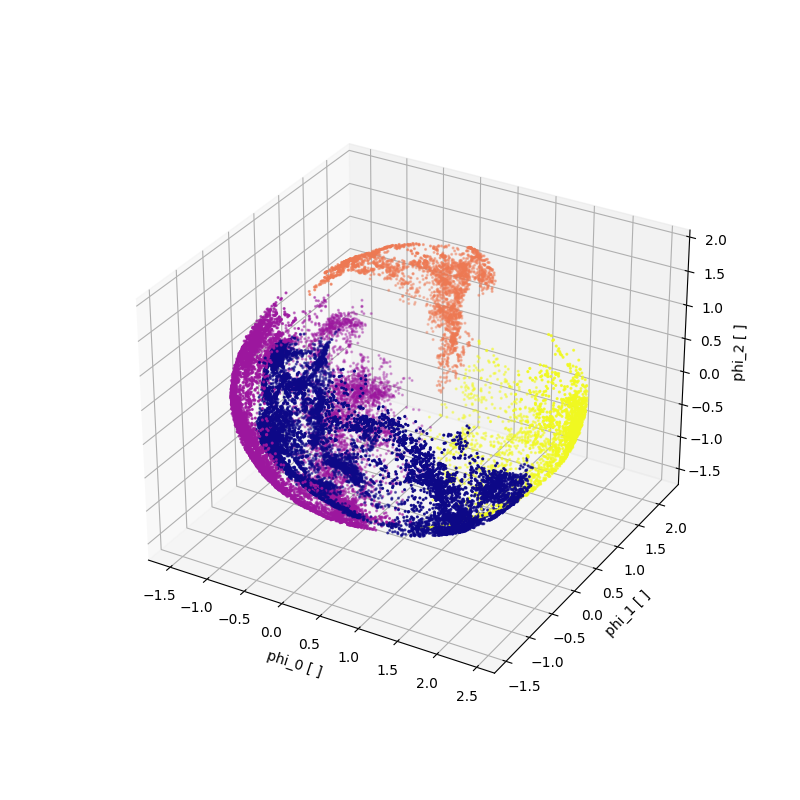

<IPython.core.display.Javascript object>


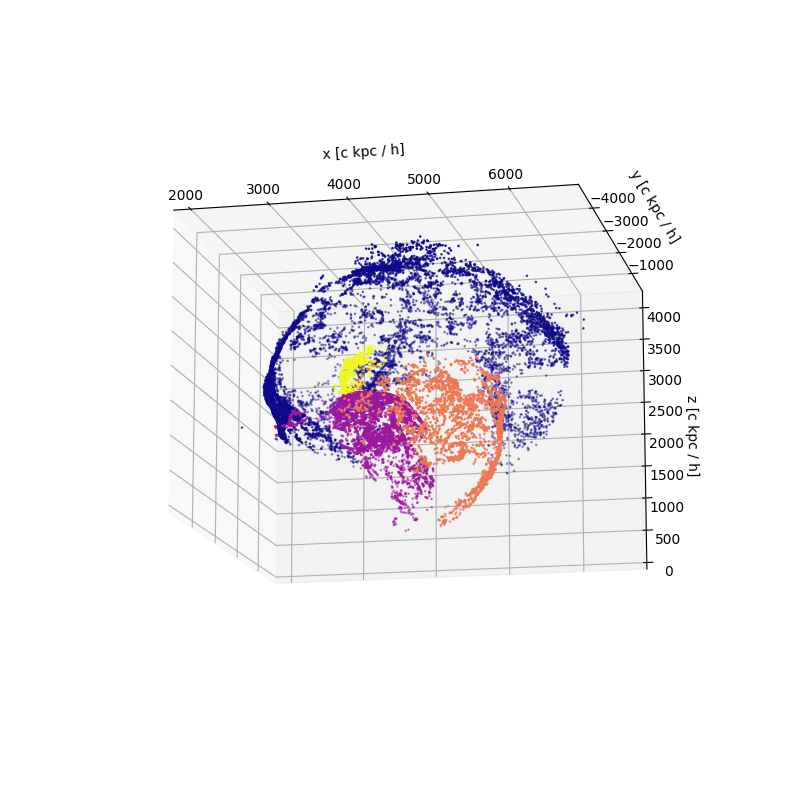

In [8]:
# full data 
# ll = {
#     "750": 0.101,
#     "760": 0.14,
#     "770": 0.24,
#     "780": 0.190,
#     "790": 0.125,
#     "800": 0.115,
#     "810": 0.130,
#     "820": 0.13,
# }
#  n_max_data=800000 
ll = {
    "750": 0.11,
    "760": 0.14,
    "770": 0.2,
    "780": 0.190,
    "790": 0.15,
    "800": 0.135,
    "810": 0.11,
    "820": 0.13,
}
vc_2.run_fof(
    linking_length=ll[f"{snap_id}"],
#     linking_length=0.21,
    min_group_size=700,
    use_scaled_data=True,
)

labels, counts = vc_2.get_labels(return_counts=True)
print(labels, counts)
vc_2.plot_cluster(n_step=1, plot_kernel_space=True)
vc_2.plot_cluster(n_step=1, maker_size=3.0)
# vc_2.plot_cluster(n_step=1, remove_uncertain=False)

In [9]:
# labels, counts = vc_2.get_labels(return_counts=True)
# vc_2.cluster_labels[vc_2.cluster_labels <0] = labels.shape[0]
# vc_2.plot_cluster(n_step=1)

In [10]:
# vc_2.export_cluster(f"vc_methodD_{snap_id}", remove_uncertain=False, remove_evno=True)